# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

**Propósito**

El presente proyecto tiene la finalidad de analizar el comportamiento de los clientes del operador de telecomunicaciones **Megaline**. En concreto, busco analizar los hábitos de consumo de dos grupos de clientes: los que cuentan con un plan de tarifa denominado **Surf** y los que cuentan con un plan de tarifa **Ultimate**, con el fin de que mis resultados permitan tomar decisiones certeras respecto al manejo del presupuesto destinado a publicidad en estos planes.

Para realizar esta tarea, será necesario utilizar los recursos que proporciona Python, en conjunto con librerías como Numpy, Matplotlib, Pandas, Psipy y Math, con el objetivo de conocer los datos a profundidad, determinar si los datos son aptos o necesitan ser tratado, visualizar los datos y realizar pruebas de hipótesis sobre los requerimientos necesarios para hacer un uso inteligente del presupuesto de la empresa. El objetivo final es obtener conclusiones útiles para la toma de decisiones estratégicas.

## Inicialización

In [2]:
# Cargamos las librerias necesarias para desarrollar todo el proceso de análisis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import math
import scipy.stats as st

## Cargar datos

In [3]:
# Cargamos los datasets necesarios para el desarrollo del análisis.
calls_df = pd.read_csv("megaline_calls (1).csv")
internet_df = pd.read_csv("megaline_internet.csv")
messages_df = pd.read_csv("megaline_messages.csv")
plans_df = pd.read_csv("megaline_plans.csv")
users_df = pd.read_csv("megaline_users.csv")

## Preparar los datos

Los datos proporcionados para este proyecto se dividen en cinco tablas (**calls**, **messages**, **internet**, **plans**, **users**). Cada tabla será explorada por separado en las siguientes secciones para verificar su estructura, calidad de datos y posibles transformaciones necesarias. En este paso solo se enuncia la estrategia general de exploración.

## Tarifas

In [4]:
# Información general/resumida sobre el DataFrame de las tarifas
plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [5]:
# Muestra de los datos para las tarifas
plans_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


**Conclusiones**
* Los datos están completos, no hay valores nulos.
* Los tipos de datos son correctos.
* Al revisar el diccionario de datos, notamos que la columna **plan_name** difiere, en nombre, de la columna **plan** en los datos de la tabla **users**. Es conveniente hacer este cambio para facilitar futuras uniones entre tablas.
* Al revisar el diccionario de datos, notamos que la columna **mb_per_month_included** está en megabytes, al igual que los datos de la tabla **internet** (**mb_used**), pero el cobro extra es por gigabytes. Por consistencia y para facilitar posibles cálculos posteriores, se agregará una nueva columna con los datos incluidos convertidos a GB.

## Corregir datos

In [6]:
# Se renombra la colmna plan_name a plan para futuras uniones con la tabla users_df
plans_df.rename(columns={"plan_name" : "plan"}, inplace = True)

## Enriquecer los datos

In [7]:
# Se añade una columna que indique los GB incluidos en cada plan
plans_df["gb_per_month_included"] = plans_df["mb_per_month_included"] / 1024
plans_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Usuarios/as

In [8]:
# Información general/resumida sobre el DataFrame de usuarios
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [9]:
# Muestra de datos para usuarios
users_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


**Conclusiones**
* La tabla contine 500 registros, uno por cada usuario.
* Únicamente la columna **churn_date** contiene valores ausentes (34 nulos), lo cual es esperado. En este contexto, esto signfica que la mayoría de los usuarios en nuestra muestra seguían activos al momento de extraer los datos.
* Las columnas **reg_date** y **churn_date** están en formato object, por lo que será necesario convertirla al tipo **datetime** para realizar análisis basados en tiempo.
* No se observan errores evidentes en las demás columnas.

### Corregir los datos

In [10]:
# Conversión de las columnas de fechas al tipo datatime
users_df["reg_date"] = pd.to_datetime(users_df["reg_date"])
users_df["churn_date"] = pd.to_datetime(users_df["churn_date"])

### Enriquecer los datos

Se optó por incluir una nueva columna (**reg_month**), que indica el mes de registro de cada usuario. Esta columna puede resultar útil más adelante.

In [11]:
# Se agrega una nueva columna para el mes de registro de cada cliente.
users_df['reg_month'] = users_df['reg_date'].dt.month
users_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,5


## Llamadas

In [12]:
# Información general/resumida sobre el DataFrame de las llamadas
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
# Imprime una muestra de datos para las llamadas
calls_df.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


**Conclusiones**
* La tabla contiene 137,735 registros sobre llamadas realizadas por los usuarios.
* No hay valores nulos.
* La columna **call_date** está en formato **object**, por lo que es necesario convertirla a tipo **datetime** para trabajar con fechas.
* La columna **duration** indica la duración de la llamada en minutos y está en formato **float**. Según los requerimientos del proyecto, cada llamada debe redondearse hacia arriba a minutos enteros, incluso si dura solo un segundo.
* Por lo tanto, será necesario agregar una nueva columna con la duración redondeada, que represente la duración facturada de cada llamada.

### Corregir los datos

In [14]:
# Se convierte call_date de tipo object a tipo datetime
calls_df["call_date"] = pd.to_datetime(calls_df["call_date"])

### Enriquecer los datos

Además de agregar una columna con el redondeo de los minutos (para representar la duración para la facturación), se optó por extraer el mes de las llamadas para posibles análisis mensuales de las llamadas por usuarios.

In [15]:
# Adición de una columna con los minutos redondeados hacia arriba, para representar el cobro real por llamada
calls_df["call_minutes"] = np.ceil(calls_df["duration"])
# Adición de una columna con los meses de las llamadas
calls_df["month"] = pd.to_datetime(calls_df["call_date"]).dt.month
# Comprobación
calls_df.head()

,id,user_id,call_date,duration,call_minutes,month
0,1000_93,1000,2018-12-27,8.52,9.0,12
1,1000_145,1000,2018-12-27,13.66,14.0,12
2,1000_247,1000,2018-12-27,14.48,15.0,12
3,1000_309,1000,2018-12-28,5.76,6.0,12
4,1000_380,1000,2018-12-30,4.22,5.0,12


## Mensajes

In [16]:
# Información general/resumida sobre el DataFrame de los mensajes
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [17]:
# Imprime una muestra de datos para los mensajes
messages_df.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


**Conclusiones**
* La tabla contiene 76,051 registros sobre mensajes enviados por los usuarios (sin valores nulos en ninguna columna).
* La columna **message_date** está en formato **object**, por lo que será necesario convertirla al tipo **datetime**.
* Para facilitar posibles futuros análisis mensuales, puede ser útil agregar una columna con el número de mes en que se envío cada mensaje. 

### Corregir los datos

In [18]:
# Conversión de la columna message_date al tipo datetime
messages_df["message_date"] = pd.to_datetime(messages_df["message_date"])

### Enriquecer los datos

In [19]:
# Adición de una nueva columna con el mes del mensaje
messages_df["month"] = messages_df["message_date"].dt.month
# Comprobación
messages_df.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


## Internet

In [20]:
# Información general/resumida sobre el DataFrame de internet
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [21]:
# Muestra de datos para el tráfico de internet
internet_df.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


**Conclusiones**
* La tabla contiene 104,825 registros de sesiones de navegación web (sin valores ausentes en las columnas).
* La columna **session_date** está en formato **object** y debe convertirse a **datetime**.
* Aunque el cobro por datos extra se hace por **GB** mensuales redondeando hacia arriba, esto no se aplica aquí aún.
* Es útil agregar una columna que indique el mes en que ocurrió cada sesión.

### Corregir los datos

In [22]:
# Conversión de la columa session_date al tipo datetime
internet_df["session_date"] = pd.to_datetime(internet_df["session_date"]) 

### Enriquecer los datos

In [23]:
# Adición de una nueva columna con el mes de ocurrencia de las sesiones por usuario
internet_df["month"] = internet_df["session_date"].dt.month
# Comprobación
internet_df.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


## Estudiar las condiciones de las tarifas

Para comprender las tarifas por plan, comenzaremos mostrando la tabla **plans**. Así, conoceremos como se le cobra a los usuarios en función de su plan de suscripción.

In [24]:
# Condiciones de la tarifa
plans_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


**Condiciones de las tarifas**

**Surf**
* 500 minutos / 50 SMS / 15,360 MB (15 GB).
* Costo mensual: 20 USD.
* Exceso: $ 0.03 por minuto/SMS / $ 10 por GB adicional (redondeado hacia arriba).

**Ultimate**
* 3000 minutos / 1000 SMS / 30,720 MB (30 GB).
* Costo mensual: 70 USD.
* Exceso: $ 0.01 minuto/SMS / $ 7 por GB adicional (redondeado hacia arriba).

## Agregar datos por usuario

Vamos a generar una tabla consolidada: cada fila será un **usuario en un mes**, con sus minutos, sms, MB y luego su ingreso.

In [25]:
# Calculo del nuúmero de llamadas por usuario por mes en que se realizó la llamada, así como el total de minutos usados por usuario al mes.
calls_per_user_month = calls_df.groupby(["user_id", "month"]).agg(
    calls=("id", "count"),
    total_minutes=("call_minutes", "sum")
).reset_index()
# Comprobación
calls_per_user_month.head()

,user_id,month,calls,total_minutes
0,1000,12,16,124.0
1,1001,8,27,182.0
2,1001,9,49,315.0
3,1001,10,65,393.0
4,1001,11,64,426.0


In [26]:
# Calculo del total de mensajes por usuario al mes
messages_per_user_month = messages_df.groupby(["user_id", "month"]).agg(
    messages = ("id", "count")).reset_index()
# Comprobación
messages_per_user_month.head()

,user_id,month,messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [27]:
# Calculo del total de MB usados por usuario al mes
internet_per_user_month = internet_df.groupby(["user_id", "month"]).agg(
    mb_used = ("mb_used", "sum")).reset_index()
# Comprobación
internet_per_user_month.head()

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


Ahora, juntaremos los datos en un solo dataframe que represente los registros del usuario en un mes determinado.

In [28]:
# Fusión de los datos de llamadas, minutos, mensajes e Internet por user_id y month
user_monthly = calls_per_user_month.merge(messages_per_user_month, on=["user_id", "month"], how="outer")
user_monthly = user_monthly.merge(internet_per_user_month, on=["user_id", "month"], how="outer")
# Rellenado de posibles valores faltantees con 0 (por ejemplo, si en un mes no hubo llamadas)
user_monthly[["calls", "total_minutes", "messages", "mb_used"]] = user_monthly[["calls", "total_minutes", "messages", "mb_used"]].fillna(0)

In [29]:
# Añade la información de la tarifa (plan de cada usuario)
user_monthly = user_monthly.merge(users_df[["user_id", "plan"]], on = "user_id", how = "left")
# Fisión ccon la información de los planes
user_monthly = user_monthly.merge(plans_df, on = "plan", how = "left")
# Comprobación
user_monthly.head()

,user_id,month,calls,total_minutes,messages,mb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,12,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0
1,1001,8,27.0,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,15.0
2,1001,9,49.0,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,15.0
3,1001,10,65.0,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,15.0
4,1001,11,64.0,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,15.0


A continuación, realizamos el calculo de los ingresos mensuales para cada usuario. Este calculo se realiza de la siguiente manera:
* Restar el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos;
* Multiplicar el resultado por el valor del plan de llamadas;
* Añadir la tarifa mensual en función del plan de llamadas.

In [30]:
# Calcula el ingreso mensual para cada usuario
# Primero se calculan los excesos
extra_minutes = (user_monthly["total_minutes"] - user_monthly["minutes_included"]).clip(lower = 0)
extra_messages = (user_monthly["messages"] - user_monthly["messages_included"]).clip(lower = 0)
extra_gb = (np.ceil(user_monthly["mb_used"] / 1024) - user_monthly["gb_per_month_included"]).clip(lower = 0)

# Calculo total de ingresos
user_monthly["revenue"] = (user_monthly["usd_monthly_pay"] + (extra_minutes * user_monthly["usd_per_minute"]) + (extra_messages * user_monthly["usd_per_message"]) + (extra_gb * user_monthly["usd_per_gb"]))

# Comprobación
user_monthly[["user_id", "month", "plan", "calls", "total_minutes", "messages", "mb_used","mb_per_month_included", "revenue"]].head()

,user_id,month,plan,calls,total_minutes,messages,mb_used,mb_per_month_included,revenue
0,1000,12,ultimate,16.0,124.0,11.0,1901.47,30720,70.00
1,1001,8,surf,27.0,182.0,30.0,6919.15,15360,20.00
2,1001,9,surf,49.0,315.0,44.0,13314.82,15360,20.00
3,1001,10,surf,65.0,393.0,53.0,22330.49,15360,90.09
4,1001,11,surf,64.0,426.0,36.0,18504.30,15360,60.00


## Estudia el comportamiento de usuario

En esta sección, estudiaré el comportamiento mensual de los usuarios según el plan que tienen contratado (**Surf** o **Ultimate**). Calcularé estadísticas descriptivas como medias y varianzas, y visualizare los resultados para llamadas, mensajes y uso de datos.

El objetivo es identificar si existen diferencias notables en los hábitos de uso entre los clientes de ambas tarifas.

### Llamadas

In [31]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
calls_monthly_avg = user_monthly.groupby(["month", "plan"])["total_minutes"].mean().unstack()
# Comprobación
calls_monthly_avg

plan,surf,ultimate
month,,
1,203.000000,193.500000
2,297.000000,403.142857
3,330.000000,304.250000
4,351.540000,336.857143
5,399.584416,406.241379
6,431.298969,370.957447
7,449.983471,427.067797
8,410.111111,421.436620
9,414.226804,437.511628


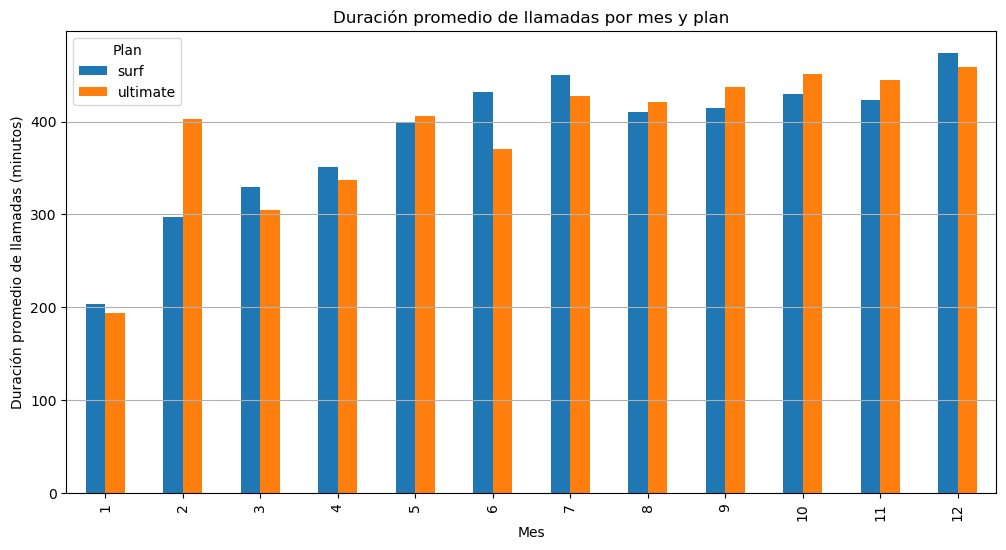

In [32]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
calls_monthly_avg.plot(kind = "bar", figsize = (12, 6))
plt.title("Duración promedio de llamadas por mes y plan")
plt.xlabel("Mes")
plt.ylabel("Duración promedio de llamadas (minutos)")
plt.grid(axis = "y")
plt.legend(title = "Plan")
plt.show()

A continuación se realiza el calculo de la media y la varianza de la duración de las llamadas para determinar si los usuarios de distintos planes se comportan de forma diferente al realizar sus llamadas.

In [33]:
# Calcula la media y la varianza de la duración mensual de llamadas.
call_stats = user_monthly.groupby('plan')['total_minutes'].agg(['mean', 'var']).reset_index()
# Comprobación
call_stats

,plan,mean,var
0,surf,428.749523,54968.279461
1,ultimate,430.450000,57844.464812


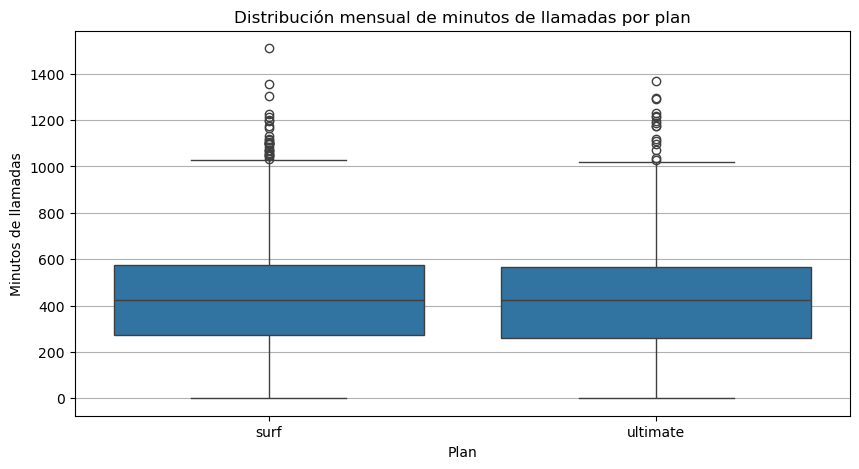

In [34]:
# Diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(10, 5))
sns.boxplot(data=user_monthly, x='plan', y='total_minutes', order=['surf', 'ultimate'])
plt.title('Distribución mensual de minutos de llamadas por plan')
plt.xlabel('Plan')
plt.ylabel('Minutos de llamadas')
plt.grid(axis='y')
plt.show()

**Conclusión sobre llamadas**

* Los usuarios de los planes **Surf** y **Ultimete** muestran un comportamiento muy similar en cuanto a la duración mensual promedio de las llamadas.
* Las estadísticas descriptivas (media y varianza) son casi idénticas para ambos planes.
* Los diagramas de caja confirman que la distribución del consumo de minutos es comparable, con **medianas** y **rangos intercuartílicos muy parecidos**.
* Aunque ambos planes tienen usuarios con consumos sumamente altos (**outliers**), la tendencia general no revela diferencias significativas en los hábitos de llamadas entre los clientes **Surf** y **Ultimate**.
* Tendencia a la alza por mes.

### Mensajes

En este apartado se analiza la cantidad mensual de mensajes que envían los usuarios, según el plan que tienen contratado. Se buscará conocer si hay diferencias importantes en el comportamiento de los usuarios de **Surf** y **Ultimate**.

In [35]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
messages_monthly_avg = user_monthly.groupby(["month", "plan"])["messages"].mean().unstack()
# Comprobación
messages_monthly_avg

plan,surf,ultimate
month,,
1,10.500000,15.500000
2,12.000000,21.571429
3,15.260870,20.250000
4,17.400000,22.047619
5,24.012987,32.103448
6,25.298969,29.340426
7,27.033058,32.830508
8,28.777778,38.478873
9,30.762887,37.895349


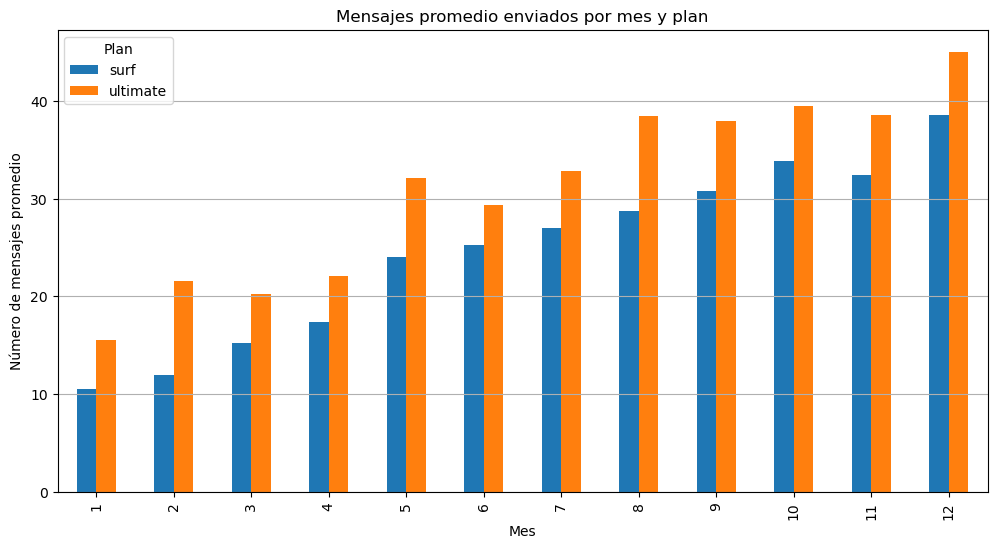

In [36]:
# Compara la cantidad de mensajes mensuales por usuarios por plan
messages_monthly_avg.plot(kind = "bar", figsize = (12, 6))
plt.title("Mensajes promedio enviados por mes y plan")
plt.xlabel("Mes")
plt.ylabel("Número de mensajes promedio")
plt.grid(axis = "y")
plt.legend(title = "Plan")
plt.show()

In [37]:
# Estadísticas descriptivas (media y varianza)
sms_stats = user_monthly.groupby('plan')['messages'].agg(['mean', 'var']).reset_index()
# Comprobación
sms_stats

,plan,mean,var
0,surf,31.159568,1126.724522
1,ultimate,37.551389,1208.756744


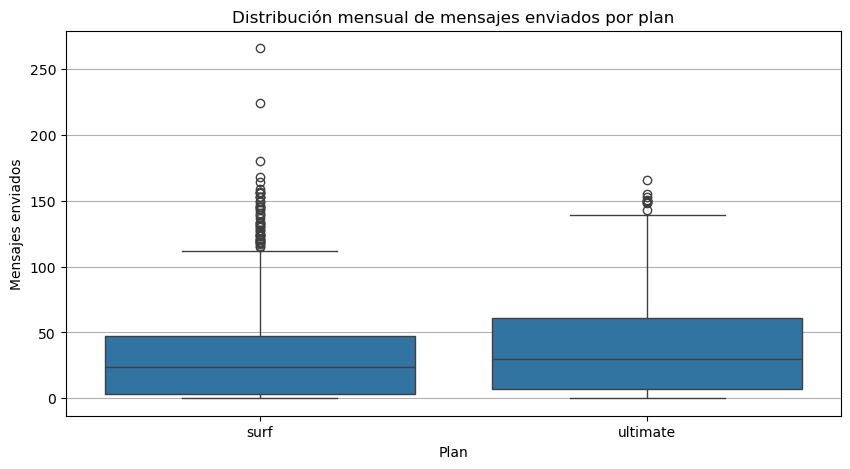

In [38]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=user_monthly, x='plan', y='messages', order=['surf', 'ultimate'])
plt.title('Distribución mensual de mensajes enviados por plan')
plt.xlabel('Plan')
plt.ylabel('Mensajes enviados')
plt.grid(axis='y')
plt.show()

**Conclusión sobre mensajes**

* Los usuarios del plan **Ultimate** tienden a enviar más mensajes que los usuarios de **Surf** (en todos los meses), tanto en promedio como en los rangos intercuartílicos.
* Los usuarios de **Surf** tienen mayores valores atípicos (**outliers**), aunque la concentración de los datos es menor.
* El diagrama de caja muestra una mayor mediana para **Ultimate**. Además, este plan, tiene una **varianza** ligeramente más alta.
* Tendencia a la alza por mes.

Esto es coherente con la estructura del plan (Ultimate incluye más SMS), lo cual parece influir en el comportamiento de los usuarios.

### Internet

A continuación se estudia el tráfico mensual de Internet por usuario, segmentado por plan.

In [39]:
# Promedio mensual de datos consumidos por plan y mes
internet_monthly_avg = user_monthly.groupby(['month', 'plan'])['mb_used'].mean().unstack()
# Comprobación
internet_monthly_avg

plan,surf,ultimate
month,,
1,4874.860000,6918.092500
2,12178.843333,17128.808571
3,13345.440000,18321.518333
4,11984.203000,16121.654762
5,13936.354935,16624.482414
6,15301.529175,15337.921064
7,16783.600579,16344.744407
8,16795.331358,17814.720141
9,16591.431289,16969.869535


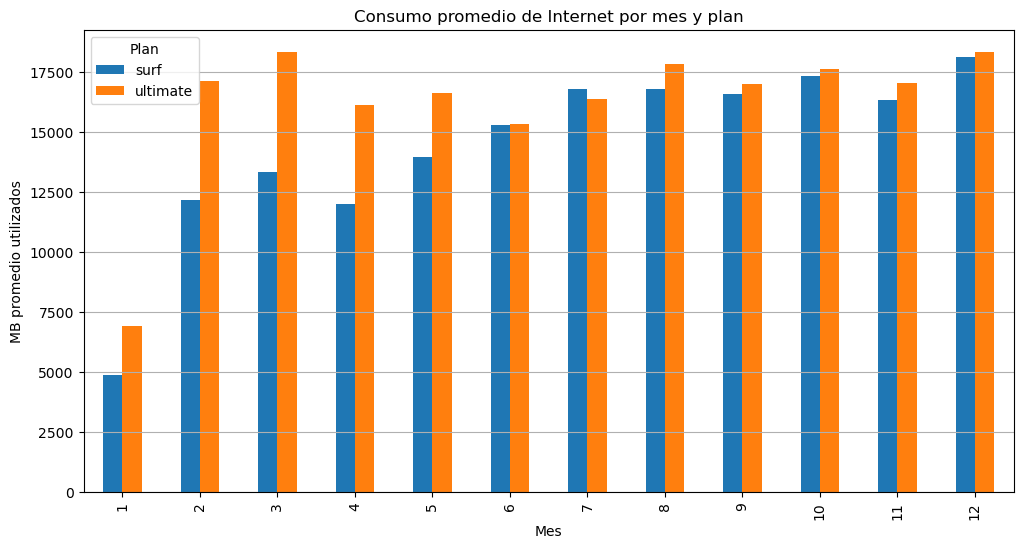

In [40]:
# Compara la cantidad de mb mensuales por usuarios por plan
internet_monthly_avg.plot(kind='bar', figsize=(12, 6))
plt.title('Consumo promedio de Internet por mes y plan')
plt.xlabel('Mes')
plt.ylabel('MB promedio utilizados')
plt.grid(axis='y')
plt.legend(title='Plan')
plt.show()

In [41]:
# Estadísticas descriptivas
mb_stats = user_monthly.groupby('plan')['mb_used'].agg(['mean', 'var']).reset_index()
# Comprobación
mb_stats

,plan,mean,var
0,surf,16558.283490,6.421640e+07
1,ultimate,17214.699694,6.165229e+07


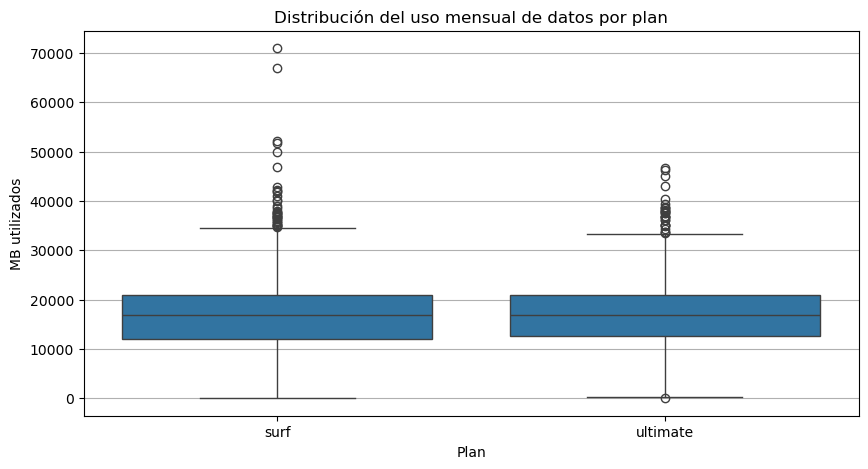

In [42]:
# Diagrama de caja para visualizar la distribución de los mb mensuales
plt.figure(figsize=(10, 5))
sns.boxplot(data=user_monthly, x='plan', y='mb_used', order=['surf', 'ultimate'])
plt.title('Distribución del uso mensual de datos por plan')
plt.xlabel('Plan')
plt.ylabel('MB utilizados')
plt.grid(axis='y')
plt.show()

**Conclusión sobre consumo de Internet**

* Los usuarios del plan **Ultimate** consumen más datos en promedio que los del plan **Surf**, como era esperable dado el límite superior del plan. Sin embargo, el promedio de consumo del plan **Surf** supera consistentemente su límite de 15 GB mensuales, mientras que el plan **Ultimate** no alcanza en promedio su límite de 30 GB.
* Ambos planes muestran una tendencia general al alza en el consumo de datos a lo largo del año.
* La mediana del consumo de datos es muy similar entre ambos planes. No obstante, el plan **Surf** presenta una varianza ligeramente mayor y una mayor concentración de valores atípicos (**outliers**), lo que indica que algunos de sus usuarios incurren en consumos excepcionalmente altos.

Esto sugiere que los usuarios de **Surf** tienden a pagar más por excedentes de consumo, reflejando un uso de datos móviles más intensivo en comparación con los usuarios de **Ultimate**.

## Ingreso

A continuación se analiza cuánto ingreso genera mensualmente cada usuario, según su plan. Esto es clave para determinar qué plan es más rentable.

In [43]:
# Promedio mensual de ingreso por plan y mes
revenue_monthly_avg = user_monthly.groupby(['month', 'plan'])['revenue'].mean().unstack()
# Comprobación
revenue_monthly_avg

plan,surf,ultimate
month,,
1,20.000000,70.000000
2,34.396667,70.000000
3,45.941304,74.666667
4,40.710600,73.000000
5,47.628182,70.724138
6,49.276289,71.638298
7,62.674050,71.898305
8,63.931173,72.859155
9,58.271495,72.034884


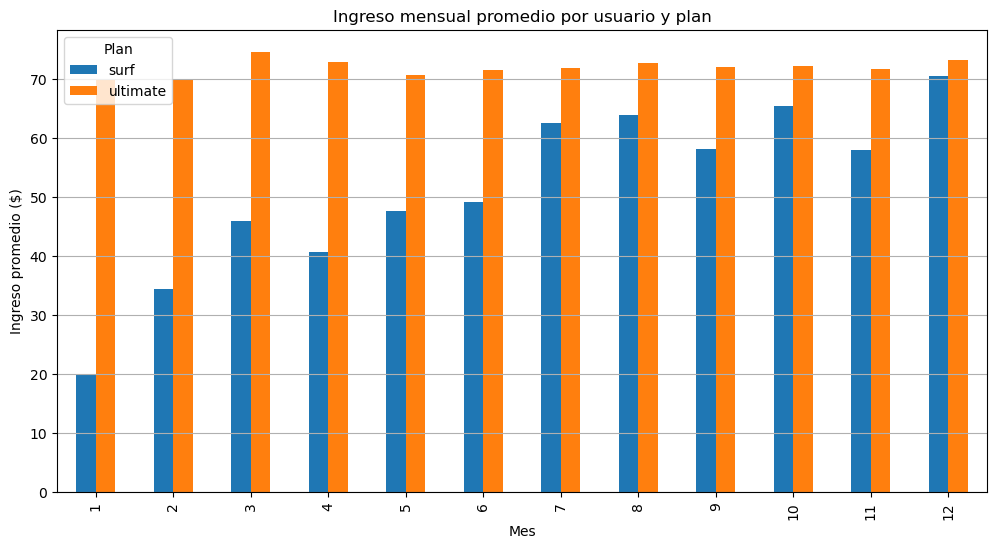

In [44]:
# Compara el ingreso mensual por plan
revenue_monthly_avg.plot(kind='bar', figsize=(12, 6))
plt.title('Ingreso mensual promedio por usuario y plan')
plt.xlabel('Mes')
plt.ylabel('Ingreso promedio ($)')
plt.grid(axis='y')
plt.legend(title='Plan')
plt.show()

In [45]:
# Estadísticas descriptivas de ingreso mensual
revenue_stats = user_monthly.groupby('plan')['revenue'].agg(['mean', 'var']).reset_index()
# Comprobación
revenue_stats

,plan,mean,var
0,surf,60.706408,3067.835152
1,ultimate,72.313889,129.848486


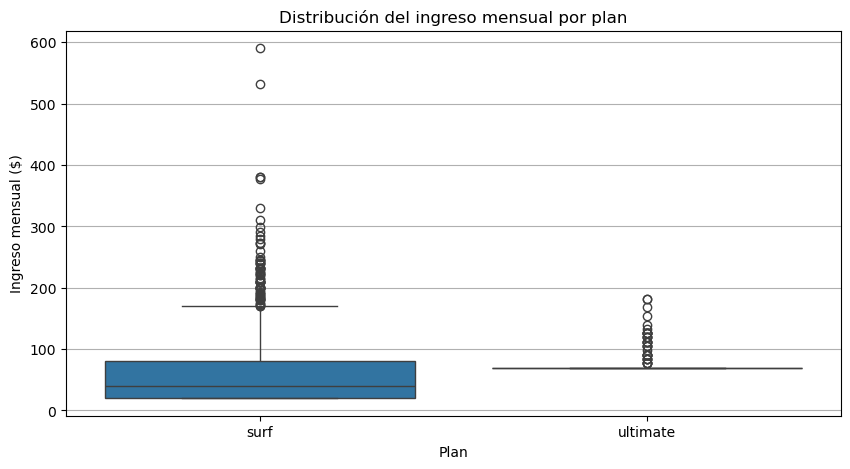

In [46]:
# Diagrama de caja para visualizar la distribución del ingreso mensual
plt.figure(figsize=(10, 5))
sns.boxplot(data=user_monthly, x='plan', y='revenue', order = ["surf", "ultimate"])
plt.title('Distribución del ingreso mensual por plan')
plt.xlabel('Plan')
plt.ylabel('Ingreso mensual ($)')
plt.grid(axis='y')
plt.show()

**Conclusión sobre ingresos**

* El plan **Ultimate** genera un ingreso promedio mensual por usuario significativamente mayor y más estable (alrededor de 72 USD) en comparación con el plan Surf (alrededor de 61 USD).
* La distribución del ingreso del plan **Ultimate** es mucho más concentrada y menos variable, con la mayoría de los usuarios pagando exactamente la tarifa mensual base de 70 USD. Por el contrario, el plan Surf, a pesar de su menor tarifa base de 20 USD, presenta una varianza de ingreso sustancialmente más alta y una gran cantidad de valores atípicos extremos. Esto indica que muchos usuarios de Surf incurren en pagos considerables por excedentes de servicios (llamadas, mensajes o datos).
* Ambos planes muestran una tendencia general al alza en el ingreso promedio mensual a lo largo del año, reflejando un mayor consumo general hacia finales del periodo (especialmente en el plan **Surf**).

## Prueba las hipótesis estadísticas

En esta sección se realizarán pruebas estadísticas para evaluar si existen diferencias significativas en los ingresos mensuales de los usuarios según el plan contratado y la región de residencia. Las hipótesis se formularán y se evaluarán con pruebas de hipótesis adecuadas.

**Hipótesis 1:** Comparación de ingresos entre planes

* **Hipótesis nula (H₀):** El ingreso mensual promedio de los usuarios del plan Surf es igual al del plan Ultimate.
* **Hipótesis alternativa (H₁):** El ingreso mensual promedio de los usuarios del plan Surf es diferente al del plan Ultimate.

Se usará una prueba de hipótesis de dos muestras independientes (**prueba t de Student**).
Establezco un nivel de significancia de **α = 0.05**.

In [47]:
# Prueba las hipótesis
# Se crean subconjuntos de ingresos mensuales según el plan
surf_revenue = user_monthly[user_monthly['plan'] == 'surf']['revenue']
ultimate_revenue = user_monthly[user_monthly['plan'] == 'ultimate']['revenue']

# Prueba de hipótesis: t-test para dos muestras independientes
results = st.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

# Resultados
print(f"Valor p: {results.pvalue}")

# Evaluar la hipótesis
alpha = 0.05
if results.pvalue < alpha:
    print("Se rechaza la hipótesis nula: hay una diferencia significativa en los ingresos.")
else:
    print("No se puede rechazar la hipótesis nula: no hay diferencia significativa en los ingresos.")

Valor p: 3.1703905481135738e-15
Se rechaza la hipótesis nula: hay una diferencia significativa en los ingresos.


**Hipótesis 2:** Comparación de ingresos por región (NY-NJ vs. otras regiones)

* **Hipótesis nula (H₀):** El ingreso mensual promedio de los usuarios de NY-NJ es igual al de los usuarios de otras regiones.
* **Hipótesis alternativa (H₁):** El ingreso mensual promedio de los usuarios de NY-NJ es diferente al de los usuarios de otras regiones.

Se usará nuevamente una **prueba t** de dos muestras independientes con **α = 0.05**.

In [48]:
# Prueba las hipótesis
# Se crean subconjuntos: usuarios
ny_nj_users = users_df[users_df['city'].str.contains("NY|NJ", case=False)]
ny_nj_ids = ny_nj_users['user_id']

# Ingresos por región
ny_nj_revenue = user_monthly[user_monthly['user_id'].isin(ny_nj_ids)]['revenue']
other_revenue = user_monthly[~user_monthly['user_id'].isin(ny_nj_ids)]['revenue']

# Prueba de hipótesis
results_region = st.ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)

# Resultados
print(f"Valor p: {results_region.pvalue}")

if results_region.pvalue < alpha:
    print("Se rechaza la hipótesis nula: hay una diferencia significativa en los ingresos por región.")
else:
    print("No se puede rechazar la hipótesis nula: no hay diferencia significativa en los ingresos por región.")

Valor p: 0.5908330350763752
No se puede rechazar la hipótesis nula: no hay diferencia significativa en los ingresos por región.


## Conclusión general

A lo largo de este análisis, se realizó una exploración profunda de los datos de usuarios, llamadas, mensajes, uso de internet y planes de la empresa Megaline, con el fin de determinar cuál de los planes (**Surf** o **Ultimate**) genera más ingresos promedio por usuario.

**Principales hallazgos**

* **Limpieza y preparación de los datos:** Se corrigieron tipos de datos (fechas y formatos), se estandarizaron unidades (por ejemplo, megabytes a gigabytes) y se agregaron columnas útiles como los meses de actividad por usuario.
* **Comportamiento de uso:**
    * No se encontraron diferencias significativas en el tiempo de llamadas entre planes.
    * Los usuarios del plan Ultimate tienden a enviar más mensajes y consumir más datos que los de Surf.
* **Ingresos:**
    * El plan **Ultimate** genera un ingreso más alto y estable, mientras que Surf presenta mayor variabilidad, con múltiples casos de usuarios que exceden los límites y generan ingresos adicionales.
    * Ambos planes muestran un incremento de ingresos hacia finales del año, indicando un mayor consumo con el tiempo.


**Resultados estadísticos**

* Se rechazó la hipótesis nula sobre la igualdad de ingresos entre planes. Existe una diferencia estadísticamente significativa entre los ingresos de Surf y Ultimate.
* No se rechazó la hipótesis nula sobre la diferencia por región. No hay evidencia suficiente para afirmar que los usuarios del área de Nueva York-Nueva Jersey generen ingresos significativamente distintos a los del resto del país.


**Recomendaciones**
* El plan Ultimate genera mayores ingresos promedio sin depender tanto del consumo excesivo, por lo que puede ser una opción más rentable para promocionar.
* El plan Surf, si bien tiene una tarifa base baja, debería ajustarse o monitorearse con campañas dirigidas a usuarios con altos consumos, para aumentar su rentabilidad sin perjudicar la experiencia del cliente.